## 🧠 Ejercicio Avanzado: Planificación de Rutas de Entrega

Una empresa de logística realiza entregas entre distintas ciudades del Ecuador. Las ciudades están conectadas por rutas con costos asociados que representan el **precio del combustible + peajes** en USD. El gerente desea conocer la **ruta más económica** para enviar mercancía desde **Ibarra** hasta **Loja**, pasando por al menos una ciudad costera.

### 📍 Ciudades:
- Ibarra
- Quito
- Santo Domingo
- Manta (costera)
- Portoviejo (costera)
- Guayaquil (costera)
- Cuenca
- Loja

### 🛣️ Conexiones y costos (USD):
- Ibarra → Quito: 10
- Quito → Santo Domingo: 15
- Quito → Manta: 30
- Santo Domingo → Manta: 12
- Manta → Portoviejo: 5
- Portoviejo → Guayaquil: 20
- Guayaquil → Cuenca: 25
- Cuenca → Loja: 18
- Quito → Cuenca: 35
- Santo Domingo → Guayaquil: 22
- Guayaquil → Loja: 40

---
### 🎯 Objetivos del estudiante
- Representar el grafo dirigido y ponderado.
- Visualizar el grafo con `networkx`.
- Usar `dijkstra_path` para determinar el **camino más económico desde Ibarra hasta Loja**, verificando que **pase por al menos una ciudad costera** (`Manta`, `Portoviejo`, o `Guayaquil`).
- Mostrar el recorrido y el costo total.

💡 *Sugerencia:* Puedes comprobar si una ciudad costera está incluida en el camino usando una intersección de conjuntos en Python.

## Rúbrica de Evaluación: Ejercicio de Logística con Grafos

| Criterio Evaluado                                                                 | Puntaje Máximo |
|----------------------------------------------------------------------------------|----------------|
| Creación correcta del grafo con nodos y aristas                              | 20 puntos      |
| Asignación correcta de pesos (costos) a todas las conexiones                 | 15 puntos      |
| Visualización clara y bien etiquetada del grafo usando `networkx` y `matplotlib` | 20 puntos      |
| Cálculo correcto del camino más barato con `dijkstra_path`                   | 15 puntos      |
| Verificación de que el camino pase por al menos una ciudad costera          | 10 puntos      |
| Interpretación correcta del resultado (camino y costo total)                 | 10 puntos      |
| Claridad del código, comentarios y estilo                                    | 10 puntos      |
| **Total**                                                                       | **100 puntos** |

**Nota:** Se valorará la creatividad, la correcta identificación de ciudades, el uso adecuado de funciones de `networkx` y la legibilidad del código.


# **Realizado por:** Joaquín Bermeo

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo dirigido
G = nx.DiGraph()

# Nodos (ciudades)
vertices = ['Ibarra','Quito', 'Santo Domingo', 'Manta', 'Portoviejo','Guayaquil','Cuenca','Loja']
G.add_nodes_from(vertices)

# Aristas con pesos (costos)
G.add_weighted_edges_from([
    ('Ibarra','Quito',10),
    ('Quito','Santo Domingo',15),
    ('Quito','Manta', 30),
    ('Santo Domingo','Manta',12),
    ('Manta','Portoviejo',5),
    ('Portoviejo','Guayaquil',20),
    ('Guayaquil','Cuenca',25),
    ('Cuenca','Loja',18),
    ('Quito','Cuenca',35),
    ('Santo Domingo','Guayaquil',22),
    ('Guayaquil','Loja',40)
])

# Posiciones para el grafo (fijo para consistencia)
pos = nx.spring_layout(G, seed=8)

Ruta más económica pasando por ciudad costera:
Ibarra → Quito → Santo Domingo → Guayaquil → Loja
Costo total:  87

Ruta más economica sin que sea necesario pasar por una ciudad costera
Ibarra → Quito → Cuenca → Loja
Costo total: 63


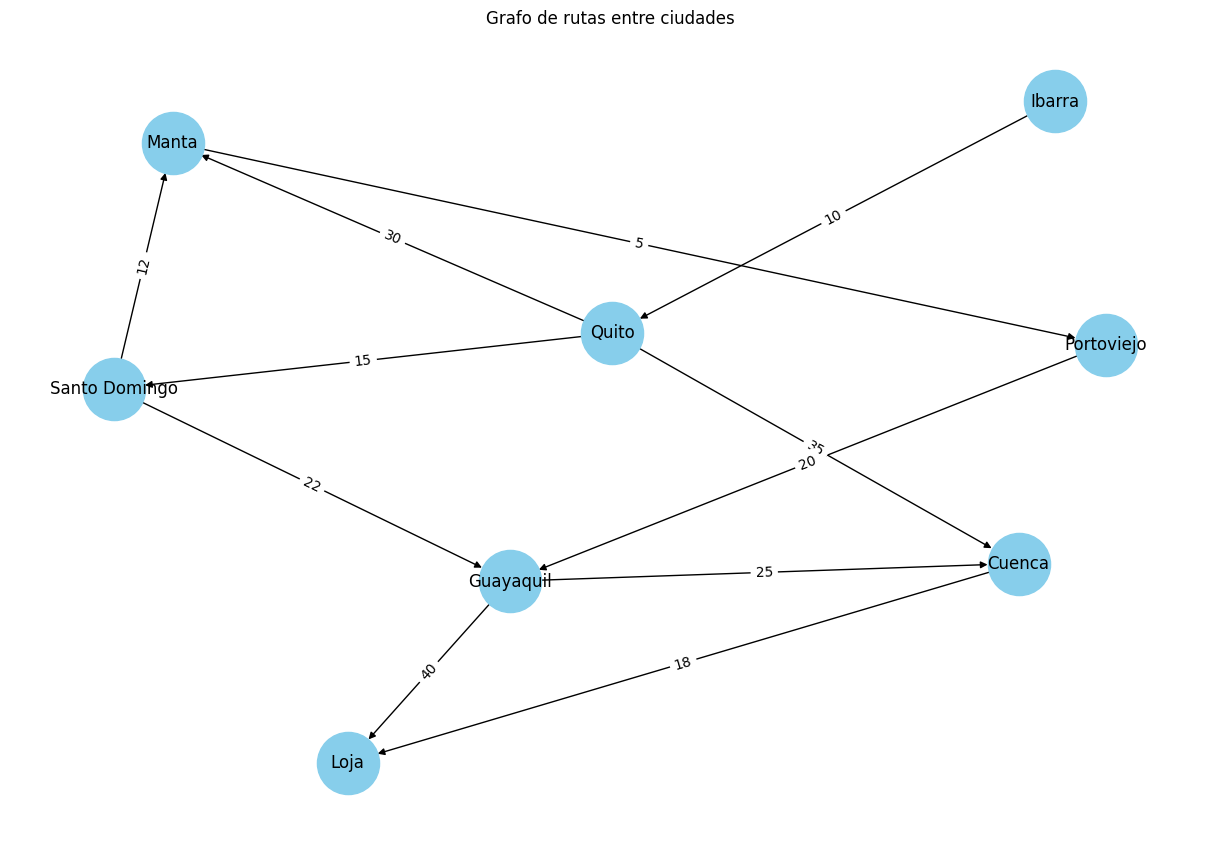

In [ ]:
# Definir ciudades costeras
costeras = ["Manta", "Portoviejo", "Guayaquil"]

# Buscar la mejor ruta que pase por una ciudad costera
mejor_camino = None
mejor_costo = float("inf") 

#Se usa un for para recorrer todas las ciudades costeras posibles
for costera in costeras:
    try:
        #Se genera el primer camino desde Ibarra hasta una de las ciudades costeras
        camino1 = nx.dijkstra_path(G, "Ibarra", costera)
        costo1 = nx.dijkstra_path_length(G, "Ibarra", costera)
        
        #Se genera el segundo camino que va desde Loja hasta una de las ciudades costeras
        camino2 = nx.dijkstra_path(G, costera, "Loja")
        costo2 = nx.dijkstra_path_length(G, costera, "Loja")
        
        #Se unen los dos caminos eliminando el ultimo elemento de la primera lista para que no se repita
        camino_total = camino1[:-1] + camino2
        costo_total = costo1 + costo2
        
        #Si el costo total es menor al mejor costo se reemplaza, esto sucedera en cada uno de los ciclos for si se encuentra un camino con menor costo
        if costo_total < mejor_costo:
            mejor_camino = camino_total
            mejor_costo = costo_total
    #Except para evitar el error que suelta la liberia NetWorkx cuando se encuentran dos caminos con el mismo costo
    except nx.NetworkXNoPath:
        continue

# Dibujar el grafo
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

#Ruta donde obligatoriamente se pasa por una ciudad costera
print("Ruta más económica pasando por ciudad costera:")
print(" → ".join(mejor_camino))
print("Costo total: ", mejor_costo)

#Ruta donde no es necesario pasar por una ciudad costera para comparar valores
camino = nx.dijkstra_path(G, source="Ibarra", target="Loja")
costo_total = nx.dijkstra_path_length(G, source="Ibarra", target="Loja")
print('\nRuta más economica sin que sea necesario pasar por una ciudad costera')
print(" → ".join(camino))
print("Costo total:", costo_total)

#Se muestra el grafico
plt.title('Grafo de rutas entre ciudades')
plt.show()